# Lab Assignment 4

## Lorenzo Stigliano, s1725018

## Task 1

**(a)** Give your solution to Exercise 1.3 from Lab 4.

In [1]:
# function to time the eigenvectors_right() function
def time_eigen(n,trails):
    import time
    time_taken = []
    for i in range(trails):
        M = random_matrix(ZZ, n, n)
        start_time = time.time() 
        M.eigenvectors_right()
        time_taken.append(time.time() - start_time)
    return mean(time_taken)

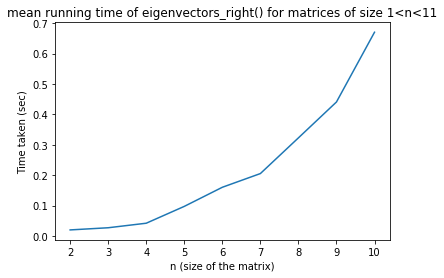

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

ax = plt.subplot(111)
n = range(2,11)
time = [time_eigen(i,4) for i in n]

ax.plot(n,time)

plt.title("mean running time of eigenvectors_right() for matrices of size 1<n<11")
plt.ylabel("Time taken (sec)")
plt.xlabel('n (size of the matrix)')

plt.show()

In [3]:
# function to time the eigenvalue() function
def time_eigenval(n,trails):
    import time
    time_taken = []
    for i in range(trails):
        M = random_matrix(ZZ, n, n)
        start_time = time.time() 
        M.eigenvalues()
        time_taken.append(time.time() - start_time)
    return mean(time_taken)

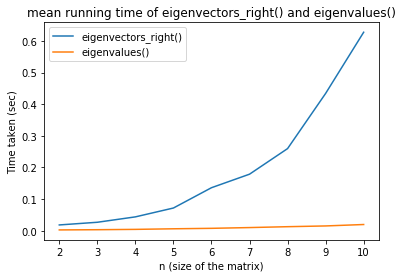

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  

ax = plt.subplot(111)
n = range(2,11)
time_eigenvec = [time_eigen(i,4) for i in n]
time_eigenvals = [time_eigenval(i,4) for i in n]

ax.plot(n,time_eigenvec,label="eigenvectors_right()")
ax.plot(n,time_eigenvals,label="eigenvalues()")

ax.legend()
plt.title("mean running time of eigenvectors_right() and eigenvalues()")
plt.ylabel("Time taken (sec)")
plt.xlabel('n (size of the matrix)')

plt.show()

## Task 2

**(a)**  What are Gerschgorin discs? Write a short introduction (a few sentences).

**(b)** Give your implementation of the `g_discs` function from Exercise 3.2 in Lab 4.


In [5]:
def g_discs(A):
    eigenvalues = [[z.real_part(), z.imag_part()] for z in A.eigenvalues()]
    disks_points = []
    n = A.nrows()
    for i in range(n):
        Ri=sum([abs(A[i][j]) for j in range(n) if i!=j])
        disks_points.append(disk((real_part(A[i][i]),imag_part(A[i][i])), Ri, (0,2*pi), alpha=0.3, thickness=1))
        disks_points.append(point(eigenvalues[i], size=20, rgbcolor=(1,0,0)))
    return add(disks_points)

**(c)** Use your `g_discs` function to plot the Gerschgorin discs for the matrix: $$\begin{bmatrix} 1 & 3 & 2 \\ 0 & 4 & 2 \\ 1 & 1 & 7 \end{bmatrix}$$

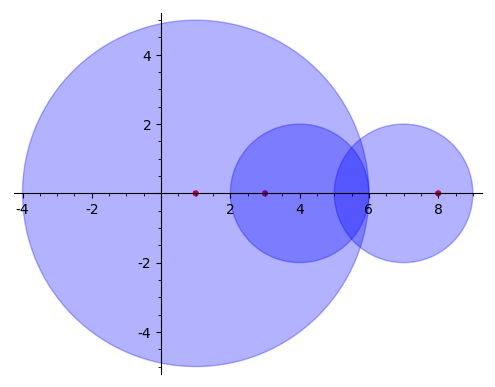

In [6]:
A = matrix(SR, [[1,3,2],[0,4,2],[1, 1, 7]])
g_discs(A)